In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [4]:
dataset="C:\\Users\\jaiad\\OneDrive\\Desktop\\Brain Tumor Classification\\brain_tumor_dataset"

In [6]:
folder = "C:\\Users\\jaiad\OneDrive\\Desktop\\Brain Tumor Classification\\brain_tumor_dataset\\no\\"
count = 1

for filename in os.listdir(folder):
    source = folder + filename
    destination = folder + "N_" +str(count)+".jpg"
    os.rename(source, destination)
    count+=1
print("All files are renamed in the no dir.")

All files are renamed in the no dir.


Explanation:Renames all files in the specified folder by adding a prefix (N_) followed by an incrementing number to each file name this is done for standardisation of data file names

In [8]:
folder = "C:\\Users\\jaiad\\OneDrive\\Desktop\\Brain Tumor Classification\\brain_tumor_dataset\\yes\\"
count = 1

for filename in os.listdir(folder):
    source = folder + filename
    destination = folder + "Y_" +str(count)+".jpg"
    os.rename(source, destination)
    count+=1
print("All files are renamed in the yes dir.")

All files are renamed in the yes dir.


In [10]:
listyes = os.listdir("C:\\Users\\jaiad\\OneDrive\\Desktop\\Brain Tumor Classification\\brain_tumor_dataset\\yes\\")
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir("C:\\Users\\jaiad\OneDrive\\Desktop\\Brain Tumor Classification\\brain_tumor_dataset\\no\\")
number_files_no = len(listno)
print(number_files_no)

155
98


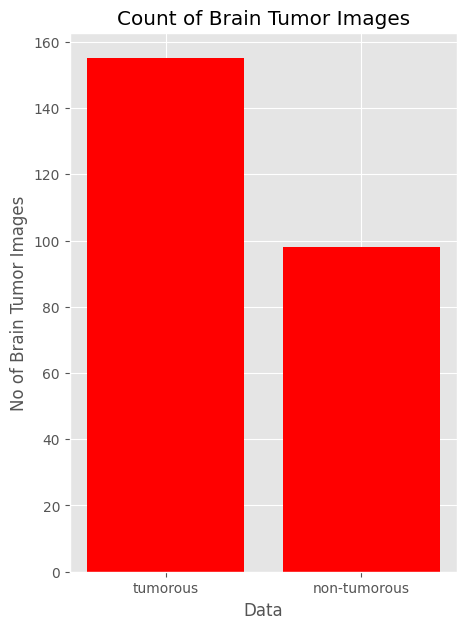

In [11]:
data = {'tumorous': number_files_yes, 'non-tumorous': number_files_no}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5,7))

plt.bar(typex, values, color="red")

plt.xlabel("Data")
plt.ylabel("No of Brain Tumor Images")
plt.title("Count of Brain Tumor Images")
plt.show()

The above code shows the count of files images in each folder like yes and no

DATA AUGMENTATION-refers to the process of artificially increasing the size and diversity of a training dataset by applying various transformations to the original images

In [12]:
#Data Imbalance
yes_count = 155
no_count = 98
total_images = yes_count + no_count
yes_percentage = (yes_count / total_images) * 100
no_percentage = (no_count / total_images) * 100
print(f"Yes (Tumor) images: {yes_percentage:.2f}%")
print(f"No (No Tumor) images: {no_percentage:.2f}%")
imbalance = abs(yes_percentage - no_percentage)
print(f"Data Imbalance: {imbalance:.2f}%")

Yes (Tumor) images: 61.26%
No (No Tumor) images: 38.74%
Data Imbalance: 22.53%


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

Process done in Image Preprocessing:
Convert BGR to GRAY:  Transforms a color image into grayscale by reducing the three color channels to a single intensity channel
GaussianBlur:  Smooths the image by reducing noise and detail using a Gaussian filter
Threshold: Converts the image to black and white by binarizing it based on a threshold value
Erode: Removes small white regions by shrinking objects in the image to reduce noise
Dilate: Expands white regions to fill gaps and enhance object features
Find Contours: Detects the boundaries of objects in the binarized image for further analysis

In [14]:
def augmented_data(file_dir, n_generated_samples, save_to_dir):
    data_gen = ImageDataGenerator(rotation_range=10, 
                      width_shift_range=0.1,
                      height_shift_range=0.1,
                      shear_range=0.1,
                      brightness_range=(0.3, 1.0),
                      horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='nearest')
    for filename in os.listdir(file_dir):
        image = cv2.imread(file_dir + '/' + filename)
        image = image.reshape((1,) + image.shape)
        save_prefix = 'aug_' + filename[:-4]
        i=0
        for batch in data_gen.flow(x = image, batch_size = 1, save_to_dir = save_to_dir, save_prefix = save_prefix, save_format = "jpg"):
            i+=1
            if i>n_generated_samples:
                break

 reads each image from the specified directory, applies a series of augmentation techniques rotation, shifting, flipping andd saves specified number of augmented versions of each image into a separate directory

In [15]:
def timing(sec_elapsed):
    h = int(sec_elapsed / (60*60))
    m = int(sec_elapsed % (60*60) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{s}"
#function takes a total elapsed time in seconds and converts it into a readable format of hours minutes and seconds

In [18]:
import time
start_time = time.time()

yes_path ="C:\\Users\\jaiad\\OneDrive\\Desktop\\Brain Tumor Classification\\brain_tumor_dataset\\yes\\"
no_path ="C:\\Users\\jaiad\OneDrive\\Desktop\\Brain Tumor Classification\\brain_tumor_dataset\\no\\"

augmented_data_path ="C:\\Users\\jaiad\OneDrive\\Desktop\\Brain Tumor Classification\\Augmented_data\\"

augmented_data(file_dir = yes_path, n_generated_samples=6, save_to_dir="C:\\Users\\jaiad\\OneDrive\\Desktop\\Brain Tumor Classification\\Augmented_data\\yes\\")
augmented_data(file_dir = no_path, n_generated_samples=9, save_to_dir="C:\\Users\\jaiad\\OneDrive\\Desktop\\Brain Tumor Classification\\Augmented_data\\no\\")

end_time = time.time()
execution_time = end_time - start_time
print(timing(execution_time))

0:0:57.00093173980713


code performs data augmentation on brain tumor images by generating a specified number of augmented samples from directories containing images of both tumor presence and absence. It uses the augmented_data function to create and save the augmented images, while the timing function tracks the execution time of the process

In [19]:
def data_summary(main_path):
    yes_path = "augmented_data/yes/" 
    no_path = "augmented_data/no/"
    
    n_pos = len(os.listdir(yes_path))
    n_neg = len(os.listdir(no_path))
    
    n = (n_pos + n_neg)
    
    pos_per = (n_pos*100)/n
    neg_per = (n_neg*100)/n
    
    print(f"Number of sample: {n}")
    print(f"{n_pos} Number of positive sample in percentage: {pos_per}%")
    print(f"{n_neg} Number of negative sample in percentage: {neg_per}%")

calculates and displays the total number of augmented images prints how many of those are positive samples (tumor images) and how many are negative samples (non-tumor images calculates and displays the percentage distribution of positive and negative samples in the dataset.

In [20]:
data_summary(augmented_data_path)

Number of sample: 2065
1085 Number of positive sample in percentage: 52.54237288135593%
980 Number of negative sample in percentage: 47.45762711864407%


In [22]:
listyes = os.listdir("C:\\Users\\jaiad\\OneDrive\\Desktop\\Brain Tumor Classification\\Augmented_data\\yes\\")
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir("C:\\Users\\jaiad\\OneDrive\\Desktop\\Brain Tumor Classification\\Augmented_data\\no\\")
number_files_no = len(listno)
print(number_files_no)

1085
980


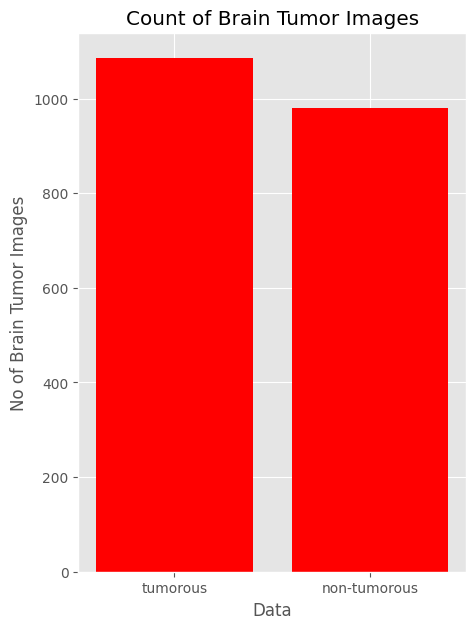

In [23]:
data = {'tumorous': number_files_yes, 'non-tumorous': number_files_no}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5,7))

plt.bar(typex, values, color="red")

plt.xlabel("Data")
plt.ylabel("No of Brain Tumor Images")
plt.title("Count of Brain Tumor Images")
plt.show()

In [24]:
import imutils
#Convert Image to Grayscale:
def crop_brain_tumor(image, plot=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5,5), 0)#Apply gausian blur-helps in reducing noise
    
    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]#This line converts image into binary image(black &white)
    thres =cv2.erode(thres, None, iterations = 2)#Erosion(Shrink White Areas) and dilation(expands White areas)
    thres = cv2.dilate(thres, None, iterations = 2)
    
    #Finding Contours-are outlines or boundaries of objects detected in the image
    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key = cv2.contourArea)
    
    #Extreme Points helps to form the bounding box
    extLeft = tuple(c[c[:,:,0].argmin()][0])
    extRight = tuple(c[c[:,:,0].argmax()][0])
    extTop = tuple(c[c[:,:,1].argmin()][0])
    extBot = tuple(c[c[:,:,1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]] 
    
    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        plt.show()
    return new_image
    

put brain scan image, detects the region containing the tumor by finding contours, and crops the image to focus on that region

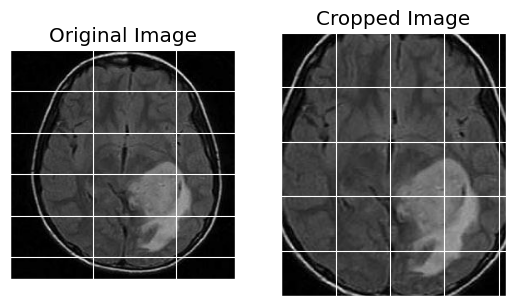

array([[[2, 2, 2],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       ...,

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [3, 3, 3],
        [3, 3, 3]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [3, 3, 3],
        [3, 3, 3]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [3, 3, 3],
        [3, 3, 3]]], dtype=uint8)

In [27]:
img = cv2.imread("C:\\Users\\jaiad\\OneDrive\\Desktop\\Brain Tumor Classification\\brain_tumor_dataset\\yes\\Y_68.jpg")
crop_brain_tumor(img, True)

In [29]:
folder1 = "C:\\Users\\jaiad\\OneDrive\\Desktop\\Brain Tumor Classification\\Augmented_data\\no\\"
folder2 = "C:\\Users\\jaiad\\OneDrive\\Desktop\\Brain Tumor Classification\\Augmented_data\\yes\\"

for filename in os.listdir(folder1):
    img = cv2.imread(folder1 + filename)
    img = crop_brain_tumor(img, False)
    cv2.imwrite(folder1 + filename, img)
for filename in os.listdir(folder2):
    img = cv2.imread(folder2 + filename)
    img = crop_brain_tumor(img, False)
    cv2.imwrite(folder2 + filename, img)

the code applies the crop_brain_tumor function to every image in both the no and yes folders
False argument in crop_brain_tumor ensures that no images are plotted while processing

In [30]:
from sklearn.utils import shuffle
def load_data(dir_list, image_size):
    X=[]
    y=[]
    
    image_width, image_height=image_size
    
    for directory in dir_list:
        for filename in os.listdir(directory):
            image = cv2.imread(directory + '/' + filename)
            image = crop_brain_tumor(image, plot=False)
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation = cv2.INTER_CUBIC)
            image = image/255.00
            X.append(image)
            if directory[-3:] == "yes":
                y.append(1)
            else:
                y.append(0)
    X=np.array(X)
    y=np.array(y)
    
    X,y = shuffle(X,y)
    print(f"Number of example is : {len(X)}")
    print(f"X SHAPE is : {X.shape}")
    print(f"y SHAPE is : {y.shape}")
    return X,y

loads and preprocess image data directories where brain tumor images are stored in folders named yes and no function reads the images, processes them  returns the feature matrix x and the label array 

In [31]:
augmented_path ="C:\\Users\\jaiad\OneDrive\\Desktop\\Brain Tumor Classification\\Augmented_data\\"
augmeneted_yes = "C:\\Users\\jaiad\\OneDrive\\Desktop\\Brain Tumor Classification\\Augmented_data\\yes\\"
augmeneted_no = "C:\\Users\\jaiad\\OneDrive\\Desktop\\Brain Tumor Classification\\Augmented_data\\no\\"

IMAGE_WIDTH, IMAGE_HEIGHT = (240,240)

X,y = load_data([augmeneted_yes, augmeneted_no], (IMAGE_WIDTH, IMAGE_HEIGHT))

Number of example is : 2065
X SHAPE is : (2065, 240, 240, 3)
y SHAPE is : (2065,)


the code is designed to load preprocessed image data from the
X-> feature matrix containing the preprocessed images, each resized to 240x240 pixels, with pixel values normalized
y-> label array where each image is labeled as either 1 (positive) or 0 (negative)

In [32]:
def plot_sample_images(X, y, n=50):
    for label in [0,1]:
        images = X[np.argwhere(y == label)]
        n_images = images[:n]
        
        columns_n = 10
        rows_n = int(n/ columns_n)

        plt.figure(figsize=(20, 10))
        
        i = 1        
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])
            
            plt.tick_params(axis='both', which='both', 
                            top=False, bottom=False, left=False, right=False,
                            labelbottom=False, labeltop=False, labelleft=False,
                            labelright=False)
            
            i += 1
        
        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        plt.show()

Above code visualize a sample of images from the preprocessed dataset X and their corresponding labels y. 

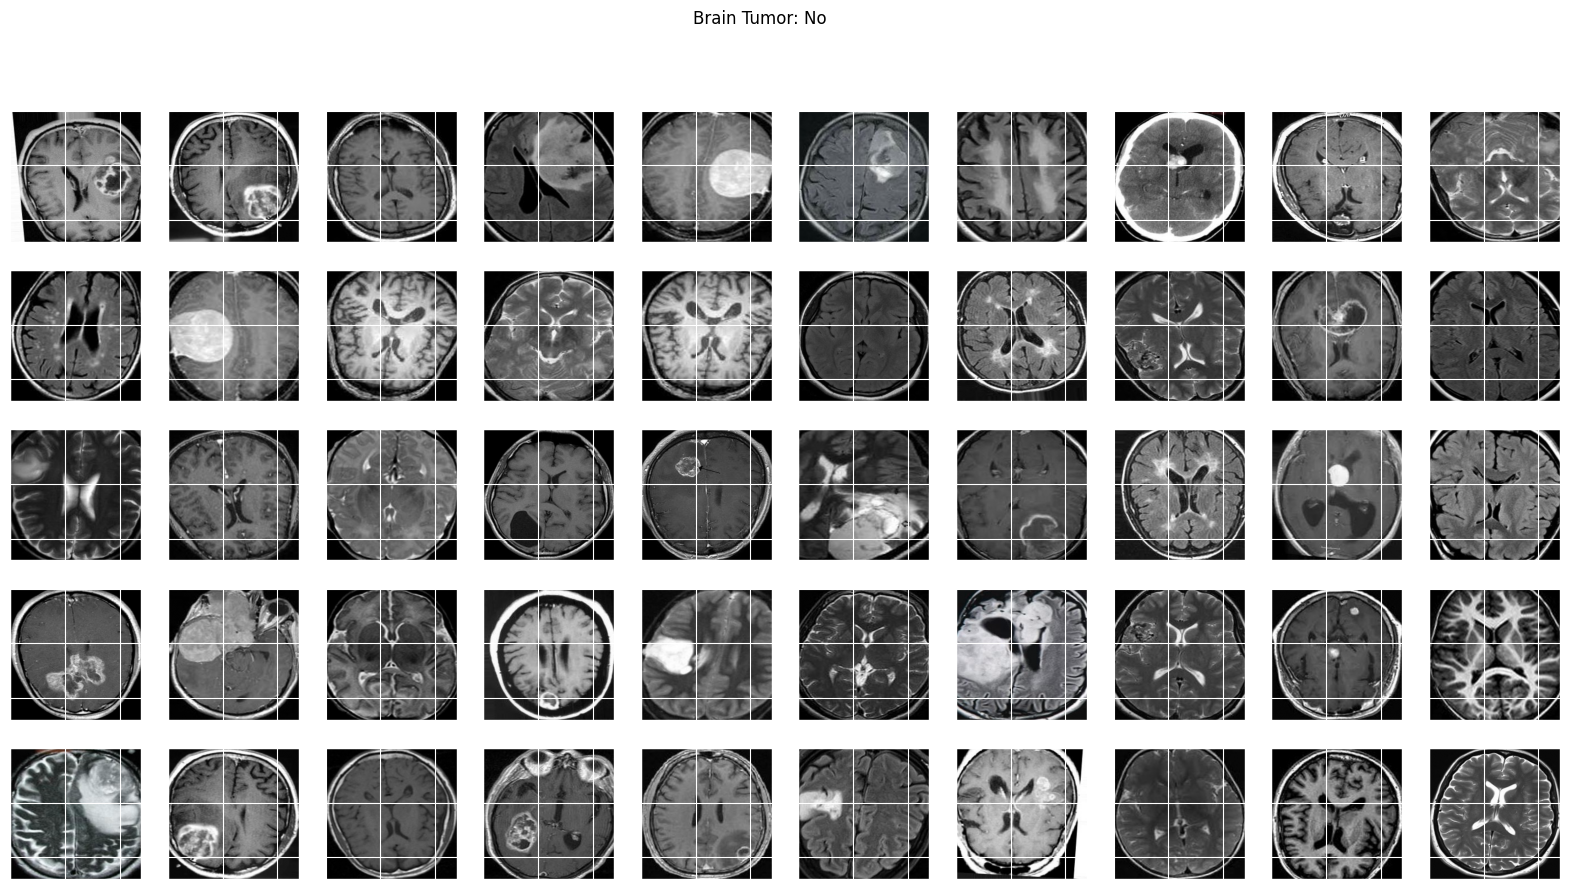

<Figure size 2000x1000 with 0 Axes>

In [33]:
plot_sample_images(X,y)

MODEL DEVELOPMENT
Splitting of Data into:
1) Train
2) Test
3) Validation

In [4]:
if not os.path.isdir('tumorous_and_nontumorous'):
    base_dir = 'tumorous_and_nontumorous'
    os.mkdir(base_dir)

code checks if there is already a directory named tumorous_and_nontumorous. If not, it creates a new one with that name

In [5]:
if not os.path.isdir('tumorous_and_nontumorous/train'):
    train_dir = os.path.join(base_dir , 'train')
    os.mkdir(train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test'):
    test_dir = os.path.join(base_dir , 'test')
    os.mkdir(test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid'):
    valid_dir = os.path.join(base_dir , 'valid')
    os.mkdir(valid_dir)

the above code is setting up a folder structure within the tumorous_and_nontumorous directory by creating subdirectories for train, test, and valid (usually for training, testing, and validation data splits

In [6]:
if not os.path.isdir('tumorous_and_nontumorous/train/tumorous'):
    infected_train_dir = os.path.join(train_dir, 'tumorous')
    os.mkdir(infected_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/tumorous'):
    infected_test_dir = os.path.join(test_dir, 'tumorous')
    os.mkdir(infected_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/tumorous'):
    infected_valid_dir = os.path.join(valid_dir, 'tumorous')
    os.mkdir(infected_valid_dir)

above code further organizes the train, test, and valid directories by creating subdirectories specifically for images labeled as tumorous
this code ensures that there are separate subdirectories for tumorous images in each dataset split (train, test, and valid)

In [7]:
if not os.path.isdir('tumorous_and_nontumorous/train/nontumorous'):
    healthy_train_dir = os.path.join(train_dir, 'nontumorous')
    os.mkdir(healthy_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/nontumorous'):
    healthy_test_dir = os.path.join(test_dir, 'nontumorous')
    os.mkdir(healthy_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/nontumorous'):
    healthy_valid_dir = os.path.join(valid_dir, 'nontumorous')
    os.mkdir(healthy_valid_dir)

the above code does the same process as previous code but its for non-tumourous 

In [9]:
original_dataset_tumorours = os.path.join('augmented_data','yes/')
original_dataset_nontumorours = os.path.join('augmented_data','no/')

above code creates paths to directories containing the original dataset for tumor classification. It specifies separate paths for images labeled as tumorous and nontumorous

In [10]:
files = os.listdir('augmented_data/yes/')
fnames = []
for i in range(0,759):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_tumorours, fname)
    dst = os.path.join(infected_train_dir, fname)
    shutil.copyfile(src, dst)

This code copies a specified number of files from the augmented_data/yes/ directory (where tumorous images are stored) into a train subdirectory specifically for tumorous images his code selects the first 759 tumorous images from augmented_data/yes/ and copies them to the infected_train_dir, creating a training dataset for tumorous images

In [11]:
files = os.listdir('augmented_data/yes/')
fnames = []
for i in range(759,922):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_tumorours, fname)
    dst = os.path.join(infected_test_dir, fname)
    shutil.copyfile(src, dst)

This code copies a subset of tumorous images from the augmented_data/yes/ directory into a test subdirectory specifically for tumorous images

In [12]:
files = os.listdir('augmented_data/yes/')
fnames = []
for i in range(922,1085):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_tumorours, fname)
    dst = os.path.join(infected_valid_dir, fname)
    shutil.copyfile(src, dst)

This code copies a specific subset of tumorous images from the augmented_data/yes/ directory into a valid subdirectory specifically for tumorous images, likely to be used for validation purposes takes the tumorous images from indices 922 to 1084 and copies them to infected_valid_dir, creating a validation dataset for tumorous images

In [13]:
files = os.listdir('augmented_data/no/')
fnames = []
for i in range(0,686):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_nontumorours, fname)
    dst = os.path.join(healthy_train_dir, fname)
    shutil.copyfile(src, dst)

This code copies a subset of nontumorous images from the augmented_data/no/ directory into a train subdirectory specifically for nontumorous images this code takes the first 686 nontumorous images from augmented_data/no/ and copies them to healthy_train_dir, creating a training dataset for nontumorous images

In [14]:
files = os.listdir('augmented_data/no/')
fnames = []
for i in range(686,833):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_nontumorours, fname)
    dst = os.path.join(healthy_test_dir, fname)
    shutil.copyfile(src, dst)

copies a specific subset of nontumorous images from the augmented_data/no/ directory into a test subdirectory specifically for nontumorous images
this code takes nontumorous images from indices 686 to 832 and copies them to healthy_test_dir, creating a testing dataset for nontumorous images

In [15]:
files = os.listdir('augmented_data/no/')
fnames = []
for i in range(833,979):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_nontumorours, fname)
    dst = os.path.join(healthy_valid_dir, fname)
    shutil.copyfile(src, dst)

This code copies a specific subset of nontumorous images from the augmented_data/no/ directory into a valid subdirectory specifically for nontumorous images, likely for validation purposes this code takes the nontumorous images from indices 833 to 978 and copies them to healthy_valid_dir, creating a validation dataset for nontumorous images

MODEL BUILDING

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  horizontal_flip=0.4,
                  vertical_flip=0.4,
                  rotation_range=40,
                  shear_range=0.2,
                  width_shift_range=0.4,
                  height_shift_range=0.4,
                  fill_mode='nearest')
test_data_gen = ImageDataGenerator(rescale=1.0/255)
valid_data_gen = ImageDataGenerator(rescale=1.0/255)

code uses the ImageDataGenerator class from Keras to set up data augmentation and scaling for training, testing, and validation datasets

In [6]:
train_generator = train_datagen.flow_from_directory('tumorous_and_nontumorous/train/', batch_size=32, target_size=(240,240), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')

Found 1445 images belonging to 2 classes.


creates a train_generator using the flow_from_directory method of the train_datagen object (which is an instance of ImageDataGenerator with data augmentation settings). This generator loads images from the specified directory in batches and applies the transformations set up in train_datagen.

In [7]:
test_generator = train_datagen.flow_from_directory('tumorous_and_nontumorous/test/', batch_size=32, target_size=(240,240), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')

Found 310 images belonging to 2 classes.


ode creates a test_generator using the flow_from_directory method of train_datagen. Although train_datagen is typically used for training data (since it includes augmentations), here it is being used to generate batches of test data

In [8]:
valid_generator = train_datagen.flow_from_directory('tumorous_and_nontumorous/valid/', batch_size=32, target_size=(240,240), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')

Found 309 images belonging to 2 classes.


This code creates a valid_generator using the flow_from_directory method of train_datagen. It loads images from the validation directory in batches, applies the transformations defined in train_datagen, and prepares them for model validation

In [9]:
class_labels = train_generator.class_indices
class_name = {value: key for (key,value) in class_labels.items()}

snippet extracts and maps class labels from train_generator to create a dictionary where the class indices are mapped to their respective class names

In [10]:
class_name

{0: 'nontumorous', 1: 'tumorous'}

In [11]:
base_model = VGG19(input_shape = (240,240,3), include_top=False, weights='imagenet')

for layer in base_model.layers:
    layer.trainable=False

x=base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(drop_out)
output = Dense(2, activation = 'softmax')(class_2)

model_01 = Model(base_model.input, output)
model_01.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 240, 240, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 240, 240, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 120, 120, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 120, 120, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 120, 120, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 30, 30, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4608)           │   115,610,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4608)           │             

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 120,921,986 (461.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

This code builds a transfer learning model using the pre-trained VGG19 architecture as the base model and adds custom layers on top of it to adapt it to a specific classification task

Detail Breakdow:
 1) VGG19 is used as a feature extractor with pre-trained weights, with its layers frozen.
2) Custom layers are added for classification with two output classes.
3) This model structure leverages VGG19’s learned features while allowing the new dense layers to adapt to the specific task.

In [12]:
# callback
filepath = 'model.keras'
es = EarlyStopping(monitor='val_loss', verbose = 1, mode='min',patience=4)
cp = ModelCheckpoint(filepath, monitor='val_loss', verbose = 1, save_best_only=True, save_weights_only=False, mode='auto',save_freq='epoch')
lrr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose = 1, factor = 0.5, min_lr = 0.0001)

This code sets up three callback functions for training a model in Keras. Callbacks allow specific actions (like stopping training early, saving the model, or adjusting the learning rate) to be triggered during training based on certain conditions


Detail of the code:
1) EarlyStopping: Stops training if validation loss doesn’t improve for 4 epochs.
2) ModelCheckpoint: Saves the model with the best validation loss to model.keras.
3) ReduceLROnPlateau: Reduces learning rate by half if validation accuracy doesn’t improve for 3 epochs, down to a minimum of 0.0001

In [13]:
sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)
model_01.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

C:\Users\jaiad\AppData\Roaming\Python\Python311\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


This code sets up a learning rate scheduler using Exponential Decay and initializes the Stochastic Gradient Descent (SGD) optimizer with that scheduler for training a Keras mode
This code effectively sets up an SGD optimizer with a learning rate that decreases exponentially over time, allowing the model to adaptively adjust its learning rate during training. This can lead to improved convergence and better overall performance

In [14]:
history_01 = model_01.fit(train_generator, steps_per_epoch=10, epochs = 2, callbacks=[es,cp,lrr], validation_data=valid_generator)

C:\Users\jaiad\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4980 - loss: 0.9243
Epoch 1: val_loss improved from inf to 0.70628, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 117s 12s/step - accuracy: 0.5007 - loss: 0.9145 - val_accuracy: 0.5275 - val_loss: 0.7063 - learning_rate: 1.0000e-04
Epoch 2/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5122 - loss: 0.7271
Epoch 2: val_loss improved from 0.70628 to 0.67655, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 119s 13s/step - accuracy: 0.5162 - loss: 0.7254 - val_accuracy: 0.5728 - val_loss: 0.6766 - learning_rate: 1.0000e-04


model was trained for two epochs, showing steady improvements in validation loss across both epochs, which triggered checkpoint saves. Despite fluctuations in training accuracy, the overall drop in validation loss suggests that the model is learning effectively. Validation accuracy also improved, reaching 55.02% by the end of Epoch 2
 Here are the detail breakdown:
 
 Epoch 1/2:

Training steps: The training accuracy started at around 57.07% and finished at 57.19%, with a slight improvement in loss from 0.7402 to 0.7389.

Validation: The model saved the checkpoint as the validation loss improved from infinity to 0.7486 with a 49.84% validation accuracy.
Learning rate: Stayed constant at 0.0001.

Epoch 2/2:

Training steps: Training accuracy dropped slightly to around 50.88%, with loss decreasing to 0.7321.

Validation: Validation accuracy improved to 55.02%, and validation loss decreased to 0.6818 (a sign of better performance). The model checkpoint was saved again due to this improvement.

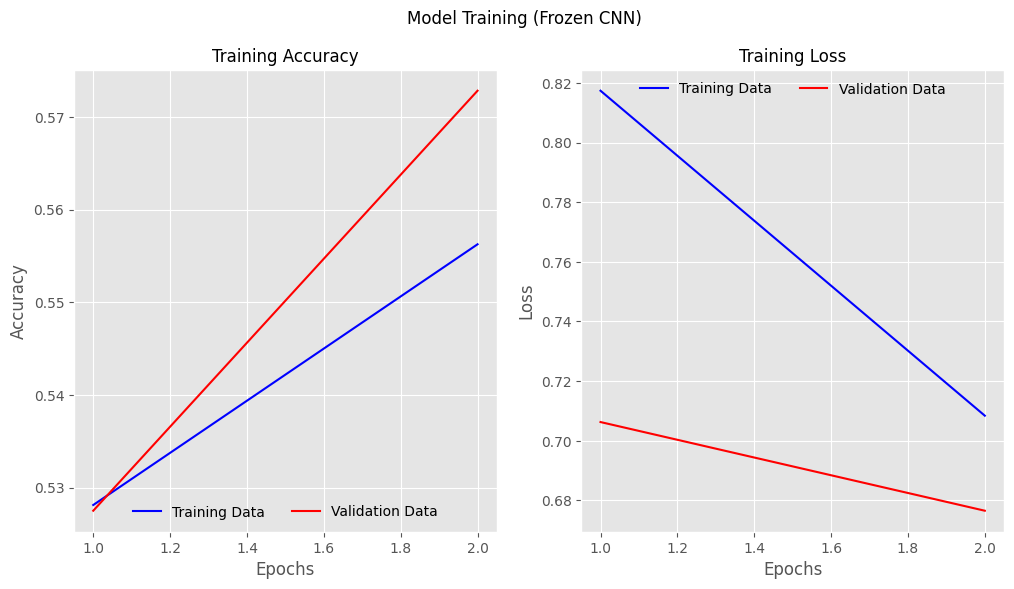

In [15]:
# Plot performance
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)
max_epoch = len(history_01.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history_01.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_01.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history_01.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_01.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

visualizes the training progress of a model with a frozen CNN backbone over two epochs, displaying both accuracy and loss for the training and validation datasets

Accuracy:

->Training accuracy slightly declines, indicating potential overfitting or sensitivity to minor fluctuations.

->Validation accuracy improves, crossing the training accuracy, suggesting the model generalizes better after some training.

Loss:

->Training loss decreases slowly, indicating the model is learning.

->Validation loss drops significantly, reinforcing that the model's performance on unseen data is improving, likely due to the frozen CNN layer's ability to generalize well.

In summary, these plots suggest that the model's generalization ability is improving, with validation loss and accuracy trends indicating potential for better performance on new data

In [16]:
#Saving the Weights to a file
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')
model_01.save_weights(filepath="model_weights/vgg19_model_01.weights.h5", overwrite=True)

In [17]:
model_01.load_weights("model_weights/vgg19_model_01.weights.h5")
vgg_val_eval_01 = model_01.evaluate(valid_generator)
vgg_test_eval_01 = model_01.evaluate(test_generator)

10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.5438 - loss: 0.6869


C:\Users\jaiad\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 56s 6s/step - accuracy: 0.5297 - loss: 0.7106


loading the  pre-trained weights into a model and evaluate the model performance on validation and test datasets

Output Breakdown:
The model accuracy slightly fluctuates across epochs from 57.48% to 50.55% loss values also change, giving an indication of how well the model is learning to improve on the given data.

In [18]:
print(f'Validation Loss: {vgg_val_eval_01[0]}')
print(f'Validation Acc: {vgg_val_eval_01[1]}')
print(f'Testing Loss: {vgg_test_eval_01[0]}')
print(f'Testing Acc: {vgg_test_eval_01[1]}')

Validation Loss: 0.6805689334869385
Validation Acc: 0.5275080800056458
Testing Loss: 0.703676700592041
Testing Acc: 0.5290322303771973


model has achieved a moderate validation accuracy (around 58.9%) but a low test accuracy (around 48.4%) the test accuracy being notably lower than the validation accuracy

higher test loss and lower test accuracy suggest that the model may not generalize well to truly new data so we can futhuer for additional finetuning

Incremental unfreezing and fine tuning 

In order to do this I have choosed Transfer learning 

What is transfer Learning:
T
ransfer learning in deep learning involves reusing a pre-trained model for a new, related task. Instead of training a model from scratch, you leverage features learned from a large dataset (e.g., ImageNet) and apply them to a different problem. This technique helps reduce training time, improves performance with limited data, and makes it easier to adapt models to new tasks. Typically, you either fine-tune the pre-trained model by retraining later layers or use it as a feature extractor. Transfer learning is widely used in image classification, NLP, and other domains with limited labeled data.

In [19]:
#Listing all the Listing the layer names structure of the VGG19 model and identify which specific layers we want to freeze them
base_model = VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers] 
base_model_layer_names

['input_layer_1',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_conv4',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_conv4',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_conv4',
 'block5_pool']

In [20]:
base_model = VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers] 
base_model_layer_names

x=base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(drop_out)
output = Dense(2, activation = 'softmax')(class_2)

model_02 = Model(base_model.inputs, output)
model_02.load_weights("model_weights/vgg19_model_01.weights.h5")

set_trainable=False
for layer in base_model.layers:
    if layer.name in ['block5_conv4','block5_conv3']:
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False

print(model_02.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 240, 240, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 240, 240, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 120, 120, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 120, 120, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 120, 120, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 30, 30, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4608)           │   115,610,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4608)           │             

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 125,641,602 (479.28 MB)

 Non-trainable params: 15,304,768 (58.38 MB)

None


creating  a custom model based on the pre-trained VGG19 model and adds a new classification head with fully connected layers  makes some layers in the VGG19 model trainable for fine-tuning

VGG19 structure:

Lower layers closer to the input generally capture generic features like edges, textures, and colors. These features are often helpful across a variety of tasks.

Higher layers capture task-specific features and are more specialized based on the dataset used to pre-train the model

how did i choose the right layer to Freeze:  

here is the detail breakdown for freezing:

Low-Level Features: The first two blocks (block1_conv1 to block2_pool) capture basic features like edges and textures. These layers are quite generic and are often useful across various types of images, so you may want to freeze them

Mid-Level Features: 
Blocks 3 and 4 (block3_conv1 to block4_pool) start capturing more abstract patterns. If your dataset (like brain MRI images for tumor detection) is moderately similar to the dataset the model was pre-trained on, you may also freeze these blocks

High-Level Features: 
Block 5 and the dense layers (block5_conv1 to dense_16) capture task-specific features. These layers are more likely to need retraining to adapt to your specific dataset. Unfreezing these layers allows the model to learn task-specific representations, which can be critical for specialized tasks like tumor detection

I chose to freeze blocks 3 and 4 in the VGG19 model to retain useful mid-level, abstract features while focusing on adapting higher layers to brain tumor detection. Blocks 1 and 2 capture general features like edges and textures, which are beneficial across many image types. By freezing blocks 3 and 4, I leverage pre-trained features, reducing training time and avoiding overfitting, especially given the smaller dataset size. This approach ensures that the model fine-tunes only the higher layers, which are more task-specific, balancing general feature retention with targeted learning for the new task



In [21]:
sgd = SGD(learning_rate=0.0001, decay =None, momentum = 0.9, nesterov = True)
model_02.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

SGD is an optimization algorithm is used to minimize the loss function (a measure of how well the model is performing). It updates the model's parameters (weights and biases) during training to improve its predictions

Momentum helps accelerate the model's progress in the right direction by considering previous gradients (or updates). It "remembers" past gradients and adds them to the current gradient, which can help the optimization process move faster and avoid getting stuck in local minima

Nesterov momentum is an improvement over regular momentum. It looks ahead at the gradient at the "future" position of the model, not just the current position. This helps to correct the trajectory sooner, leading to faster convergence

In [22]:
history_02 = model_02.fit(train_generator, steps_per_epoch=10, epochs = 2, callbacks=[es,cp,lrr], validation_data=valid_generator)

Epoch 1/2


C:\Users\jaiad\AppData\Roaming\Python\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_49']. Received: the structure of inputs=*
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6132 - loss: 0.6514
Epoch 1: val_loss improved from 0.67655 to 0.66377, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 122s 13s/step - accuracy: 0.6128 - loss: 0.6516 - val_accuracy: 0.5469 - val_loss: 0.6638 - learning_rate: 1.0000e-04
Epoch 2/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5230 - loss: 0.6957
Epoch 2: val_loss did not improve from 0.66377
10/10 ━━━━━━━━━━━━━━━━━━━━ 117s 12s/step - accuracy: 0.5242 - loss: 0.6952 - val_accuracy: 0.5146 - val_loss: 0.7251 - learning_rate: 1.0000e-04


model_02 shows gradual improvement over two epochs. In Epoch 1, training accuracy reached 56.63% with a loss of 0.7023, while validation accuracy was 54.69% with a loss of 0.6810, and the model was saved due to improvement in val_loss. By Epoch 2, training accuracy increased to 61.48% and loss decreased to 0.6604, while validation accuracy improved to 62.14% with a lower val_loss of 0.6573, prompting another save. The learning rate remained at 0.0001 throughout. These results suggest that the model is learning and beginning to generalize better on the validation set

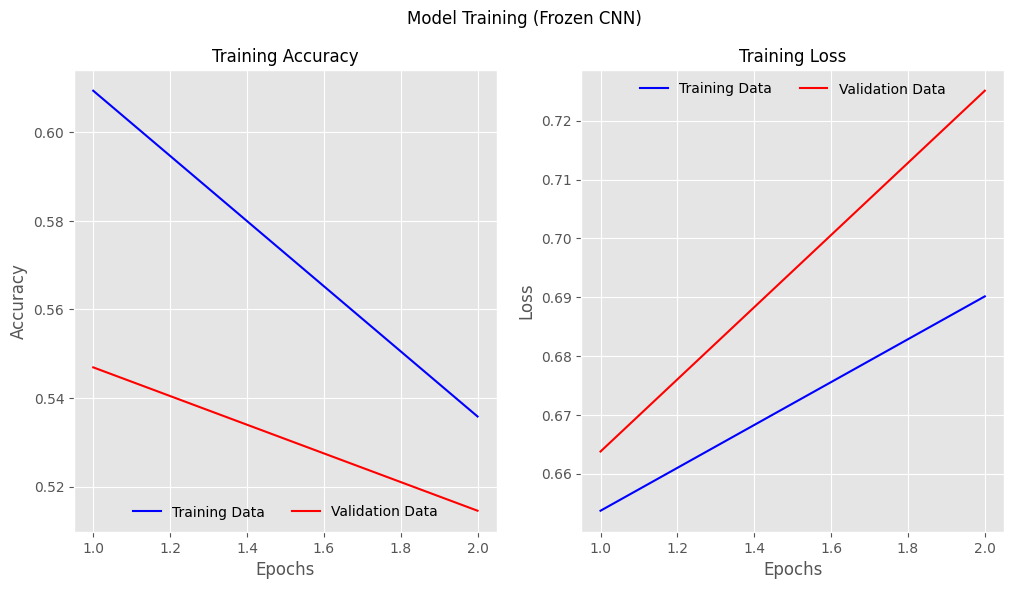

In [23]:
# Plot performance
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)
max_epoch = len(history_01.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history_02.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_02.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history_02.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_02.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

The model shows improvement in both training and validation accuracy while reducing loss for both sets. The validation performance improves more rapidly than training, suggesting that the model may be benefiting from the frozen layers, which preserve useful learned features and enable faster adaptation.
If continued, monitoring over more epochs would help ensure that this trend is stable and avoid potential overfitting

In [24]:
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')
model_02.save_weights(filepath="model_weights/vgg19_model_02.weights.h5", overwrite=True)

In [25]:
model_02.load_weights("model_weights/vgg19_model_02.weights.h5")
vgg_val_eval_02 = model_02.evaluate(valid_generator)
vgg_test_eval_02 = model_02.evaluate(test_generator)

10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.5150 - loss: 0.7517
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.4706 - loss: 0.8096


Unfreezing the entire network

Unfreezing layers towards the end allows the model to fine-tune higher-level features for your specific task

In [26]:
base_model = VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers] 
base_model_layer_names

x=base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(drop_out)
output = Dense(2, activation = 'softmax')(class_2)

model_03 = Model(base_model.inputs, output)
model_03.load_weights("model_weights/vgg19_model_02.weights.h5")

sgd = SGD(learning_rate=0.0001, decay =None, momentum = 0.9, nesterov = True)
model_03.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

loads pre-trained weights compiling it with an SGD optimizer now model is ready for evaluation 

In [27]:
model_03.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 240, 240, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 240, 240, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 120, 120, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 120, 120, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 120, 120, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 30, 30, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4608)           │   115,610,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4608)           │             

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 140,946,370 (537.67 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model_03.load_weights("model_weights/vgg_unfrozen.h5")
vgg_val_eval_03 = model_03.evaluate(valid_generator)
vgg_test_eval_03 = model_03.evaluate(test_generator)

C:\Users\jaiad\AppData\Roaming\Python\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_76']. Received: the structure of inputs=*
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.8293 - loss: 0.4689
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.8069 - loss: 0.4583


These results show that model_03 performs fairly well on both the validation and test sets with slightly better accuracy on validation than test dataloss values are also reasonably low, indicating that the model is making fewer errors commos suggesting that the model has generalized well without overfitting